Import packages

In [47]:
import io
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import vision

Authenticate Google Cloud

In [15]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'client_file_vision_ai_demo.json'
client = vision.ImageAnnotatorClient()

Define the image file

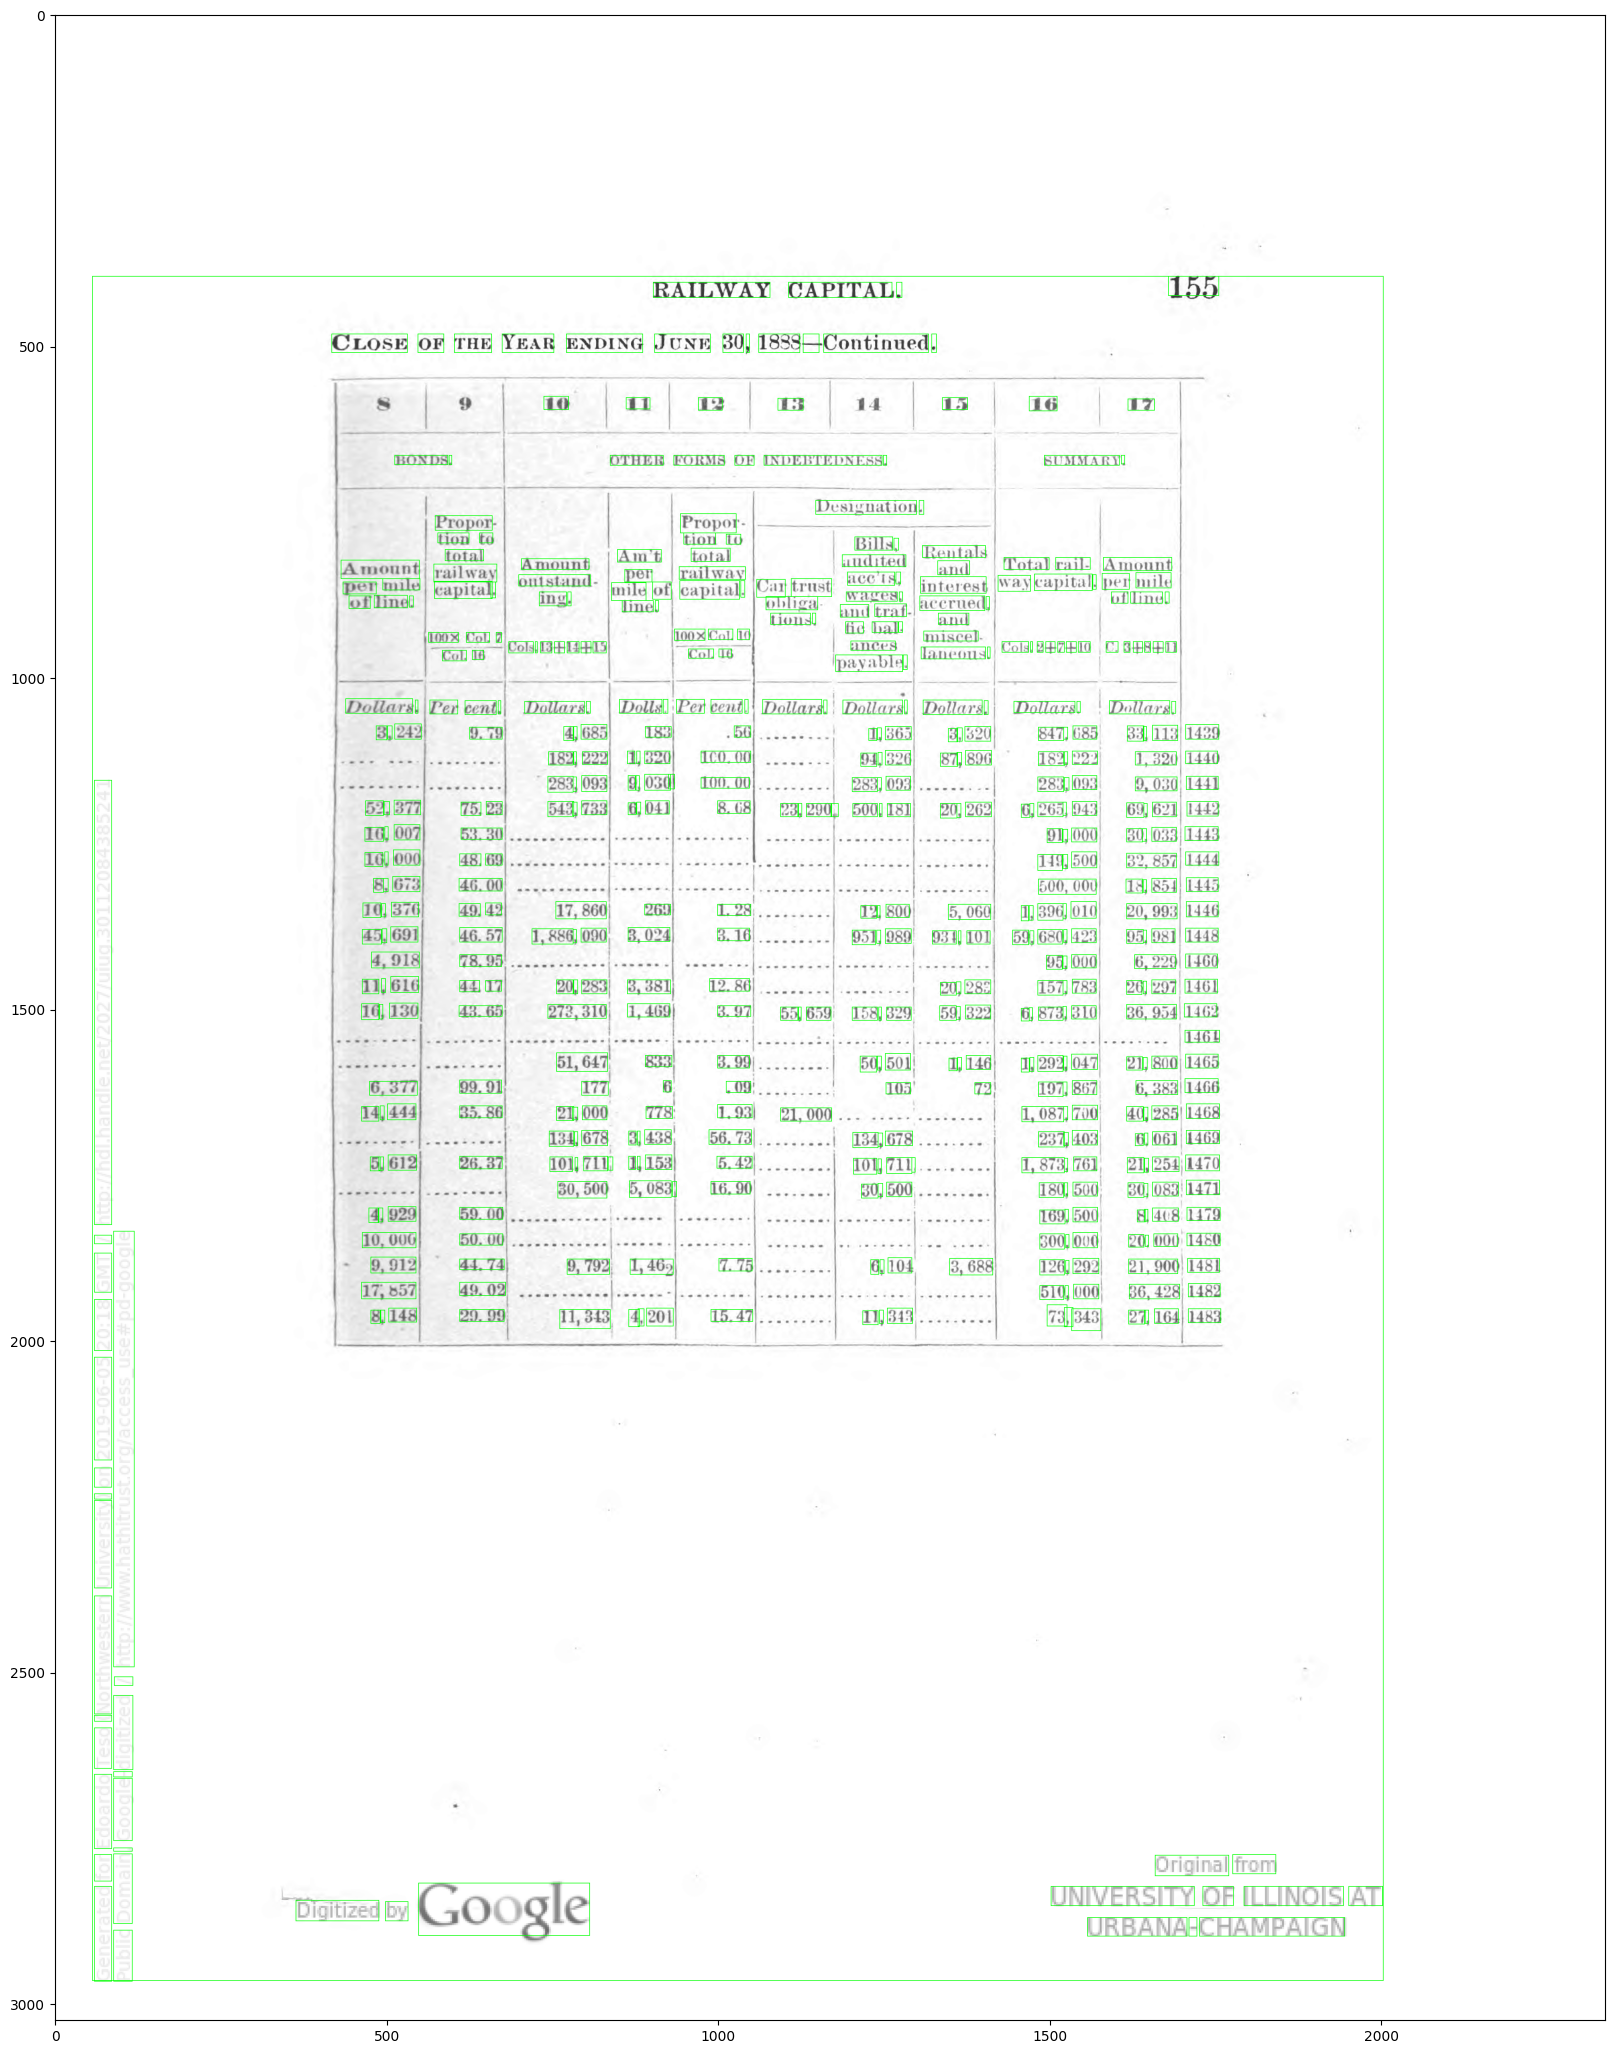

In [51]:
image_path = '/Users/michaelgiordano/Documents/Research/Leander_Heldring/OCR_Improvements/google_vision_ai_demo/images/1888_Page_161.png'
cvimage = cv2.imread(image_path)
_, encoded_image = cv2.imencode('.png', cvimage)
api_image = vision.Image(content=encoded_image.tobytes())
response = client.text_detection(image = api_image)
texts = response.text_annotations

for text in texts:
    # print (text.description)
    vertices = np.array(
        [(vertex.x, vertex.y) 
             for vertex in text.bounding_poly.vertices
        ])
    # We are using cv2 rectnagle method to draw bounding boxes
    # that requires 2 points on the image to draw the box
    # The top,left co-ordinates and bottom,right co-ordindates of the box
    # We can get those using the code below. 
    xmin, xmax = min(vertices[:, 0]), max(vertices[:, 0])
    ymin, ymax = min(vertices[:, 1]), max(vertices[:, 1])
    
    cv2.rectangle(cvimage, (xmin, ymin), (xmax, ymax), (0, 255, 0), 1)

if response.error.message:
    print(response.error.message)

plt.figure(figsize=(20, 40))
plt.imshow(cvimage)

In [ ]:
with io.open(image_path, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)

Get the response back from Cloud Vision

In [25]:
response = client.text_detection(image=image)
print(response)

vertices {
  x: 56
  y: 395
}
vertices {
  x: 2003
  y: 395
}
vertices {
  x: 2003
  y: 2965
}
vertices {
  x: 56
  y: 2965
}

0.0
Generated for Edoardo Teso (Northwestern University) on 2019-06-05 20:18 GMT / http://hdl.handle.net/2027/uiug.30112084385241
Public Domain, Google-digitized / http://www.hathitrust.org/access_use #pd-google
CLOSE OF THE YEAR ENDING JUNE 30, 1888-Continued.
BONDS.
Propor-
tion to
total
Amount railway
mile
per
capital.
of line.
Dollars. Per cent.
3, 242
9.79
52, 377
16, 007
16, 000
8, 673
10, 376
45, 691
4,918
11, 616
16, 130
6,377
14, 444
5, 612
4, 929
10,000
9,912
17,857
8, 148
100x Col. 7
Col. 16
Digitized by
75. 23
53.30
48. 69
46.00
49. 42
46.57
78.95
44. 17
43.65
99.91
35.86
26.37
59.00
50.00
44.74
49.02
29.99
10
Cols. 13+14+15
RAILWAY CAPITAL.
11
17,860
1,886, 090
Am't
Amount
per
outstand-
ing.
OTHER FORMS OF INDEBTEDNESS.
Google
269
3,024
20, 283 3,381
273,310 1,469
total
railway
mile of capital. Car trust
line.
obliga-
tions.
12
833
51,647
177
6
21,

This is my attempt at trying to extract specific information from Cloud Vision's response

In [ ]:
for text in response.text_annotations:
    print(text.bounding_poly)
    print(text.score)
    print(text.description)